# Intro to NLP (Natural Language Processing): Week 5 - NLP in Action (Supervised Text Classification)

Dataset Link: https://www.kaggle.com/c/fake-news/data

Dataset Name: train.csv, test.csv, submit.csv

Dataset Description: Build a system to identify unreliable news articles, using 3 files:
- train.csv: A full training dataset with the following attributes:
  - id: unique id for a news article
  - title: the title of a news article
  - author: author of the news article
  - text: the text of the article; could be incomplete
  - label: a label that marks the article as potentially unreliable
    - 1: unreliable
    - 0: reliable

- test.csv: A testing training dataset with all the same attributes at train.csv without the label.

- submit.csv: A sample submission that you can

**Steps to access, download, and use the dataset:**



1.   Access the above link to kaggle, click on "Data" tab and download "train.csv", "test.csv", and submit.csv.
2.   Once downloaded, click on the files to unzip them. 
3.   Save the file in a folder easily accessible - E.g. "Documents"
4.   Open a Google Colab Notebook
5.   In the left pane of the Google Colab, click on "Files" and select the upload icon (Icon hover text: "Upload to session storage")
6.   You are ready to start using the data in the Colab Notebook.



Data location within Colab: '/content/train.csv', '/content/test.csv', and '/content/submit.csv'

Check whick folder in the Google Colab notebook we are currently in?

In [ ]:
pwd

'/content'

Now that we know which folder we are in, how do we see if the data we loaded (in step 5 above) is correctly loaded or not?

In [ ]:
ls

sample_data/  submit.csv  test.csv  train.csv




---



---



## Load dataset + describe data

In [ ]:
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
import seaborn as sns
from matplotlib import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cols=['num','id','title','author', 'text', 'label']

train = pd.read_csv('/content/train.csv', header=0, nrows=10000, lineterminator='\n')
train = train.applymap(lambda x: x.strip() if isinstance(x, str) else x)

train.columns=['num', 'id','title','author', 'text', 'label']

nRow, nCol = train.shape
print(f'There are {nRow} rows and {nCol} columns in the training set')

# Removing empty rows from csv 
train.dropna(axis=0, how='all',inplace=True)
nRow, nCol = train.shape
print(f'There are {nRow} rows and {nCol} columns in the training set after removing empty rows')

train.head()

There are 10000 rows and 6 columns in the training set
There are 10000 rows and 6 columns in the training set after removing empty rows


,num,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train = train[~train['text'].str.contains("İletişim", na=False)]

In [ ]:
cols=['num','id','title','author', 'text']

test = pd.read_csv('/content/test.csv', header=0, nrows=10000, lineterminator='\n')
test = test.applymap(lambda x: x.strip() if isinstance(x, str) else x)

test.columns=['num', 'id','title','author', 'text']

nRow, nCol = test.shape
print(f'There are {nRow} rows and {nCol} columns in the testing set')

# Removing empty rows from csv 
test.dropna(axis=0, how='all',inplace=True)
nRow, nCol = test.shape
print(f'There are {nRow} rows and {nCol} columns in the testing set after removing empty rows')

test.head()

There are 5200 rows and 5 columns in the testing set
There are 5200 rows and 5 columns in the testing set after removing empty rows


,num,id,title,author,text
0,20800,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test = test[~test['text'].str.contains("İletişim", na=False)]

In [ ]:
cols=['id', 'label']

submit = pd.read_csv('/content/submit.csv', header=0, nrows=10000, lineterminator='\n')
submit = submit.applymap(lambda x: x.strip() if isinstance(x, str) else x)

submit.columns=['id','label']
nRow, nCol = submit.shape
print(f'There are {nRow} rows and {nCol} columns in the submit set')

# Removing empty rows from csv 
submit.dropna(axis=0, how='all',inplace=True)
nRow, nCol = submit.shape
print(f'There are {nRow} rows and {nCol} columns in the submit set after removing empty rows')

submit.head()

There are 5200 rows and 2 columns in the submit set
There are 5200 rows and 2 columns in the submit set after removing empty rows


,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [ ]:
train = train[pd.to_numeric(train['num'], errors='coerce').notnull()]

nRow, nCol = train.shape
print(f'There are {nRow} rows and {nCol} columns in the training set')

train.head()

There are 9997 rows and 6 columns in the training set


,num,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
test = test[pd.to_numeric(test['num'], errors='coerce').notnull()]

nRow, nCol = test.shape
print(f'There are {nRow} rows and {nCol} columns in the testing set')

test.head()

There are 5197 rows and 5 columns in the testing set


,num,id,title,author,text
0,20800,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
submit = submit[pd.to_numeric(submit['id'], errors='coerce').notnull()]

nRow, nCol = submit.shape
print(f'There are {nRow} rows and {nCol} columns in the submit set')

submit.head()

There are 5200 rows and 2 columns in the submit set


,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


## Pre-Processing Steps:
These are the same from previous sessions: 
  - Expand contractions
  - Noise cleaning
  - Remove *stopwords*

### Parts of Speech (POS) Tagging

#### Import libraries

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Contraction Mapping

!pip install contractions
import contractions

     |████████████████████████████████| 245kB 4.7MB/s 
     |████████████████████████████████| 317kB 10.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81698 sha256=346df9bebdcea141c72320d2fcd69b51d420e9f33c6f40d6884c2259624e15c1
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


#### Expand Contractions

In [ ]:
train_text = train_new['text']
train_text = train_text.to_frame()

train_text.sample(10, random_state = 5)

,text
5403,Fortune Magazine just identified Google and Fa...
442,Share on Facebook \nUnless you’ve been living ...
4166,"Posted on October 30, 2016 by DCG | 1 Comment ..."
6638,Blue tie or red dress? Look left or look right...
2170,"Mike Rowe, the ex- Dirty Jobs star and current..."
4431,"MIDWAY ATOLL — President Obama, taking his ..."
2052,Washinton’s Blog – by David Swanson \nOfficial...
5595,"October 29th, 2016 - Fort Russ News - \nRT- Tr..."
6504,10 Medicinal Plants For Your Survival Garden \...
413,Barack Obama has been very busy pardoning a gr...


In [ ]:
train_text['text'] = train_text['text'].apply(lambda x: [contractions.fix(word) for word in x.split(' ')])
train_text.sample(10, random_state = 5)

AttributeError: ignored

In [ ]:
#joining back the list of items into one string

train_text['text'] = [' '.join(map(str, l)) for l in train_text['text']]
train_text.sample(10, random_state = 5)

,content
7054,"“O. K. Craig,” the father asks, “you ready?” “..."
442,"On an October day, Anne Davis, 76, wheeled int..."
3954,Seldom does a new credit card go viral. There ...
2288,Pressure mounted on Tuesday for Fox News to ta...
3196,ROME — A homeless man was detained on Tuesday ...
6178,This article is part of a series aimed at help...
8351,"Fresh from a tour of ‘ zones’ across Europe, B..."
5658,(Want to get this briefing by email? Here’s th...
2065,WASHINGTON — The sudden death of legislation t...
413,WASHINGTON — The Obama administration has writ...


In [ ]:
# you can explore individual cells like this

print(train_text['text'][0])
print(type(train_text['text'][0]))

WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. But a sudden loss of the disputed subsidies could conceivably because the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been demanding an

#### Noise Cleaning

In [ ]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
train_text['text'] = train_text['text'].str.lower()
train_text['text'] = train_text['text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

train_text['text'].sample(10, random_state = 5)

2757    posted by b on november 1 2016 at 0311 pm  per...
745      cdc scientist confirms donald trump is right ...
7787    department of homeland security secretary john...
69       bernie sanders berniesanders october 27 2016 ...
3159    next cold war roundup 11116 iraqi forces enter...
8537    zero hedge \nwith furious democrats  and the c...
5764    multiple ny police departments under investiga...
3265    starstruck and partyfanatic the moral paradox ...
9883    un deploys troops to american college campuses...
7469    is there any merit in taking a cynical view of...
Name: text, dtype: object

Regex explanation: 

1.   [^] matches everything but everything inside the blockquotes
2.   \w matches any word character (equal to [a-zA-Z0-9_])
3.   \d matches a digit (equal to [0-9])
4.   \s matches any whitespace character (equal to [\r\n\t\f\v ])
5.   \' matches the character ' literally (case sensitive)
6.   '+' matches between one and unlimited times, as many times as possible, giving back as needed

In [ ]:
#nltk tokenization

train_text['tokenized_text'] = train_text['text'].apply(word_tokenize)
train_text.sample(10, random_state = 5)

,text,tokenized_text
2757,posted by b on november 1 2016 at 0311 pm per...,"[posted, by, b, on, november, 1, 2016, at, 031..."
745,cdc scientist confirms donald trump is right ...,"[cdc, scientist, confirms, donald, trump, is, ..."
7787,department of homeland security secretary john...,"[department, of, homeland, security, secretary..."
69,bernie sanders berniesanders october 27 2016 ...,"[bernie, sanders, berniesanders, october, 27, ..."
3159,next cold war roundup 11116 iraqi forces enter...,"[next, cold, war, roundup, 11116, iraqi, force..."
8537,zero hedge \nwith furious democrats and the c...,"[zero, hedge, with, furious, democrats, and, t..."
5764,multiple ny police departments under investiga...,"[multiple, ny, police, departments, under, inv..."
3265,starstruck and partyfanatic the moral paradox ...,"[starstruck, and, partyfanatic, the, moral, pa..."
9883,un deploys troops to american college campuses...,"[un, deploys, troops, to, american, college, c..."
7469,is there any merit in taking a cynical view of...,"[is, there, any, merit, in, taking, a, cynical..."


In [ ]:
# initializing Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Visualizations

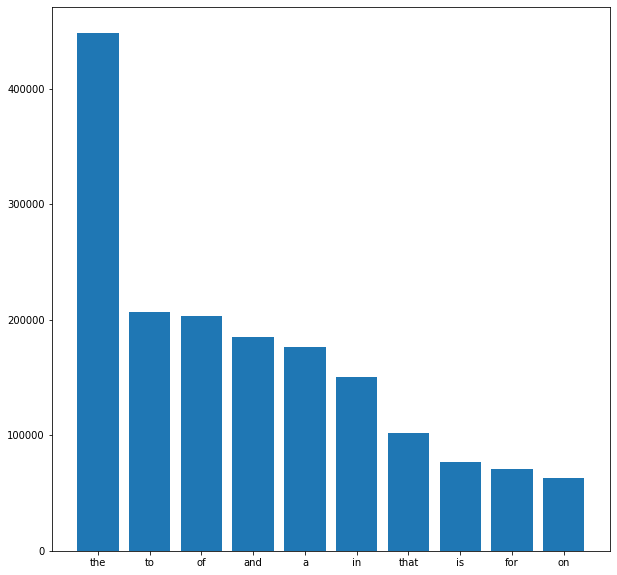

In [ ]:
# Before removing checking occurances of stopwords in article content

%matplotlib inline
from matplotlib import pyplot as plt

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(train_text['text'])

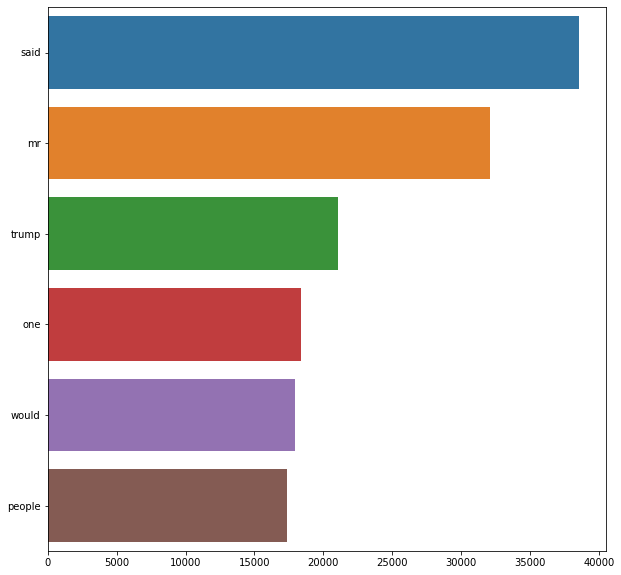

In [ ]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(train_text['text'])

# Explore more such analysis here - https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

#### Remove stopwords

In [ ]:
# Now we remove stopwords 

train_text['tokenized_text'] = train_text['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
train_text['tokenized_text_join'] = [' '.join(map(str, l)) for l in train_text['tokenized_text']]

train_text.sample(10, random_state = 5)

,text,tokenized_text,tokenized_text_join
2757,posted by b on november 1 2016 at 0311 pm per...,"[posted, b, november, 1, 2016, 0311, pm, perma...",posted b november 1 2016 0311 pm permalink com...
745,cdc scientist confirms donald trump is right ...,"[cdc, scientist, confirms, donald, trump, righ...",cdc scientist confirms donald trump right vacc...
7787,department of homeland security secretary john...,"[department, homeland, security, secretary, jo...",department homeland security secretary john ke...
69,bernie sanders berniesanders october 27 2016 ...,"[bernie, sanders, berniesanders, october, 27, ...",bernie sanders berniesanders october 27 2016 d...
3159,next cold war roundup 11116 iraqi forces enter...,"[next, cold, war, roundup, 11116, iraqi, force...",next cold war roundup 11116 iraqi forces enter...
8537,zero hedge \nwith furious democrats and the c...,"[zero, hedge, furious, democrats, clinton, cam...",zero hedge furious democrats clinton campaign ...
5764,multiple ny police departments under investiga...,"[multiple, ny, police, departments, investigat...",multiple ny police departments investigation h...
3265,starstruck and partyfanatic the moral paradox ...,"[starstruck, partyfanatic, moral, paradox, tru...",starstruck partyfanatic moral paradox trump su...
9883,un deploys troops to american college campuses...,"[un, deploys, troops, american, college, campu...",un deploys troops american college campuses or...
7469,is there any merit in taking a cynical view of...,"[merit, taking, cynical, view, life, observati...",merit taking cynical view life observations cy...


In [ ]:
# for sake of simplicity, showing 10 article contents based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in train_text['tokenized_text'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

[('posted', 'VBN'), ('b', 'JJ'), ('november', 'RB'), ('1', 'CD'), ('2016', 'CD'), ('0311', 'CD'), ('pm', 'NN'), ('permalink', 'NN'), ('comments', 'NNS'), ('idlib', 'JJ'), ('school', 'NN'), ('attack', 'NN'), ('fake', 'VBP'), ('bombs', 'NNS'), ('destroy', 'JJ'), ('tables', 'NNS'), ('etc', 'FW'), ('httpblauerbotecomwpcontentuploads201610idlib_schule_fake_white_helmets_faelschung_weisshelme_syrienpng', 'NN'), ('video', 'NN'), ('mixed', 'VBD'), ('least', 'JJS'), ('2', 'CD'), ('videos', 'NNS'), ('clouds', 'JJ'), ('vs', 'JJ'), ('blue', 'NN'), ('sky', 'NN'), ('httpblauerbotecomwpcontentuploads201610fake_luftangriff_syrien_faelschung_rfapng', 'JJ'), ('german', 'JJ'), ('httpblauerbotecom20161029luftangriffaufschuleisteinefaelschung', 'NN'), ('posted', 'VBD'), ('jens', 'NNS'), ('nov', 'RB'), ('1', 'CD'), ('2016', 'CD'), ('33359', 'CD'), ('pm', 'NN'), ('1', 'CD'), ('another', 'DT'), ('day', 'NN'), ('one', 'CD'), ('b', 'NN'), ('type', 'NN'), ('laptop', 'NN'), ('finally', 'RB'), ('get', 'VB'), ('enj

#### Yellow Brick: POS Visualizer

In [ ]:
# Yellow Brick is a POS visualizer - https://github.com/DistrictDataLabs/yellowbrick/blob/master/docs/api/text/postag.rst
# You may need to reload the workbook to activate it. In that case, re-run all cells again from the beginning 

!pip install -U yellowbrick

     |████████████████████████████████| 266kB 10.2MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


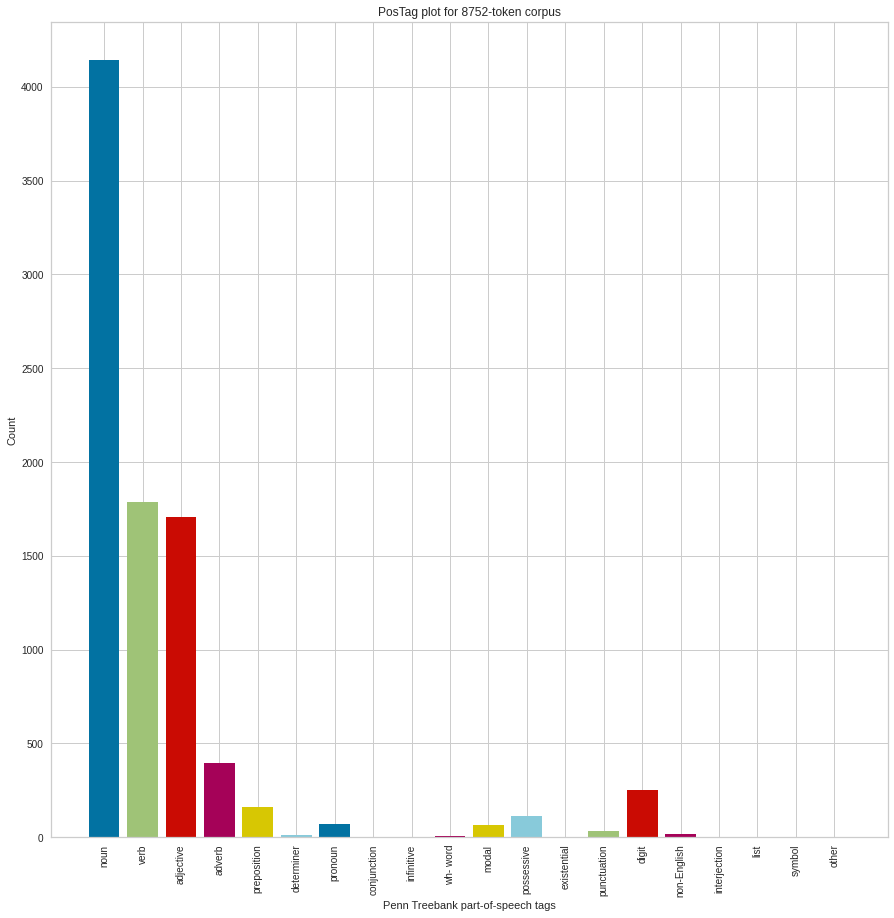

In [ ]:
# Create the visualizer

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

Some examples of POS Tags (via Universal Tagger)

Refer: http://www.nltk.org/book/ch05.html
![tagset](https://camo.githubusercontent.com/515359c32d2839f79bc166c07ff96fb70a0f82e5/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3730302f312a62444d64712d457061417232664c544e38344c6a67672e706e67)



## Text Classification

There is a equal number of distribution of target features:

In [ ]:
train["label"].value_counts()

1    5004
0    4996
Name: label, dtype: int64

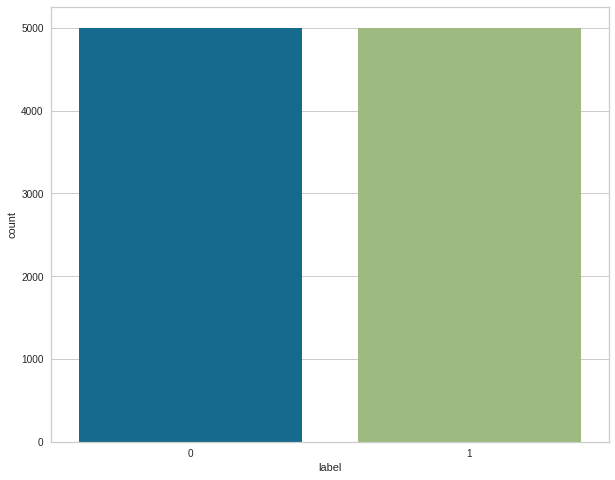

In [ ]:
rcParams["figure.figsize"] = 10,8
sns.countplot(x = train["label"])

In [ ]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(train['total'].values)
tfidf = transformer.fit_transform(counts)

In [ ]:
targets = train['label'].values
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = transformer.fit_transform(test_counts)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1466: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, random_state=0)

In [ ]:
Extr = ExtraTreesClassifier(n_estimators=5,n_jobs=4)
Extr.fit(X_train, y_train)
print('Accuracy of ExtrTrees classifier on training set: {:.2f}'
     .format(Extr.score(X_train, y_train)))
print('Accuracy of Extratrees classifier on test set: {:.2f}'
     .format(Extr.score(X_test, y_test)))

Accuracy of ExtrTrees classifier on training set: 1.00
Accuracy of Extratrees classifier on test set: 0.81


In [ ]:
from sklearn.tree import DecisionTreeClassifier

Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)
Adab.fit(X_train, y_train)
print('Accuracy of Adaboost classifier on training set: {:.2f}'
     .format(Adab.score(X_train, y_train)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format(Adab.score(X_test, y_test)))


Accuracy of Adaboost classifier on training set: 0.97
Accuracy of Adaboost classifier on test set: 0.95


In [ ]:
Rando= RandomForestClassifier(n_estimators=5)

Rando.fit(X_train, y_train)
print('Accuracy of randomforest classifier on training set: {:.2f}'
     .format(Rando.score(X_train, y_train)))
print('Accuracy of randomforest classifier on test set: {:.2f}'
     .format(Rando.score(X_test, y_test)))



Accuracy of randomforest classifier on training set: 0.98
Accuracy of randomforest classifier on test set: 0.82


In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.78


In [ ]:


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.98


In [ ]:


targets = train['label'].values
logreg = LogisticRegression()
logreg.fit(counts, targets)

example_counts = count_vectorizer.transform(test['total'].values)
predictions = logreg.predict(example_counts)
pred=pd.DataFrame(predictions,columns=['label'])
pred['id']=test['id']
pred.groupby('label').count()



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,id
label,
0,2601
1,2599


In [ ]:
pred.to_csv('countvect5.csv', index=False)

## Resources

- https://www.kaggle.com/vpkprasanna/basemodel-logistic-and-eda